In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [53]:
location = "datasets/Kickstartercombo.csv"

df = pd.read_csv(location)
df.head()

,Unnamed: 0,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real
0,0,1000002330,The Songs of Adelaide & Abullah,Publishing,Poetry,GB,failed,1000.0,0.0,GBP,2015-08-11 12:12:00,2015-10-09 11:36:00,0,0.0,NaN,NaN
1,1,1000004038,Where is Hank?,Film & Video,Narrative Film,US,failed,45000.0,220.0,USD,2013-01-12 00:20:00,2013-02-26 00:20:00,3,220.0,NaN,NaN
2,2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,failed,5000.0,1.0,USD,2012-03-17 03:24:00,2012-04-16 04:24:00,1,1.0,NaN,NaN
3,3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,canceled,19500.0,1283.0,USD,2015-07-04 08:35:00,2015-08-29 01:00:00,14,1283.0,NaN,NaN
4,4,1000014025,Monarch Espresso Bar,Food,Restaurants,US,successful,50000.0,52375.0,USD,2016-02-26 13:38:00,2016-04-01 13:38:00,224,52375.0,NaN,NaN


In [54]:
dupe = df.duplicated() 
df[dupe]

,Unnamed: 0,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real


In [55]:
df.describe()

,Unnamed: 0,ID,goal,pledged,backers,usd pledged,usd_goal_real,usd_pledged_real
count,702411.000000,7.024110e+05,7.024110e+05,7.024110e+05,702411.000000,6.948170e+05,3.786610e+05,3.786610e+05
mean,351205.000000,1.074829e+09,4.817642e+04,9.223828e+03,103.726589,7.405969e+03,4.545440e+04,9.058924e+03
std,202768.734302,6.192006e+08,1.162920e+06,9.286016e+04,919.654297,8.144094e+04,1.152950e+06,9.097334e+04
min,0.000000,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,1.000000e-02,0.000000e+00
25%,175602.500000,5.379594e+08,2.000000e+03,3.000000e+01,2.000000,2.024000e+01,2.000000e+03,3.100000e+01
50%,351205.000000,1.075562e+09,5.000000e+03,6.150000e+02,12.000000,4.560000e+02,5.500000e+03,6.243300e+02
75%,526807.500000,1.610544e+09,1.505600e+04,4.020000e+03,55.000000,3.261000e+03,1.550000e+04,4.050000e+03
max,702410.000000,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,1.663614e+08,2.033899e+07


In [56]:
cutdf = df.drop(['Unnamed: 0', 'ID', 'name', 'launched', 'deadline'], axis=1)

In [57]:
cutdf['%pledged'] = 100*cutdf['pledged']/cutdf['goal']

In [58]:
newdf = cutdf.drop(['usd pledged','usd_goal_real','usd_pledged_real'], axis=1)

In [59]:
newdf.describe()

,goal,pledged,backers,%pledged
count,7.024110e+05,7.024110e+05,702411.000000,7.024110e+05
mean,4.817642e+04,9.223828e+03,103.726589,3.223661e+02
std,1.162920e+06,9.286016e+04,919.654297,2.691896e+04
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00
25%,2.000000e+03,3.000000e+01,2.000000,4.411765e-01
50%,5.000000e+03,6.150000e+02,12.000000,1.331000e+01
75%,1.505600e+04,4.020000e+03,55.000000,1.062667e+02
max,1.000000e+08,2.033899e+07,219382.000000,1.042779e+07


In [60]:
newdf.to_csv('modkick.csv',index=True,header=True)

In [61]:
pd.value_counts(newdf['main_category'])

Film & Video      121331
Music              98710
Publishing         74220
Games              63272
Technology         58730
Design             53979
Art                52177
Food               45844
Fashion            41232
Theater            20888
Photography        20468
Comics             19575
Crafts             16001
Journalism          8838
Dance               7145
Graphic Novels         1
Name: main_category, dtype: int64

In [62]:
newdf.groupby('main_category')['backers'].mean()

main_category
Art                40.923875
Comics            134.594943
Crafts             27.120680
Dance              43.017775
Design            239.458456
Fashion            61.815168
Film & Video       66.208875
Food               54.244678
Games             322.693703
Graphic Novels      1.000000
Journalism         38.261371
Music              51.772900
Photography        38.571477
Publishing         54.229871
Technology        164.924638
Theater            47.220557
Name: backers, dtype: float64

In [63]:
newdf.groupby('main_category')['backers', '%pledged'].median()

,backers,%pledged
main_category,,
Art,10,21.428571
Comics,39,102.350000
Crafts,3,4.400000
Dance,27,101.620000
Design,29,21.746667
Fashion,5,5.301515
Film & Video,12,13.395349
Food,6,3.950000
Games,28,18.326667


In [64]:
newdf.groupby('main_category')['backers','%pledged'].mean()

,backers,%pledged
main_category,,
Art,40.923875,255.779021
Comics,134.594943,675.514472
Crafts,27.120680,259.695502
Dance,43.017775,81.202867
Design,239.458456,201.583503
Fashion,61.815168,100.714850
Film & Video,66.208875,143.908970
Food,54.244678,85.718150
Games,322.693703,782.135841


In [65]:
comicdf = newdf.loc[newdf['main_category'] == 'Comics']
comicdf.describe()

,goal,pledged,backers,%pledged
count,1.957500e+04,1.957500e+04,19575.000000,19575.000000
mean,2.145025e+04,6.854529e+03,134.594943,675.514472
std,1.021234e+06,2.591786e+04,400.879109,11807.271912
min,1.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.500000e+03,2.485000e+02,8.000000,7.335000
50%,3.500000e+03,1.456000e+03,39.000000,102.350000
75%,8.000000e+03,5.075500e+03,117.000000,143.333333
max,1.000000e+08,1.254120e+06,14952.000000,551400.000000


In [66]:
meanp = comicdf['%pledged'].mean()
stdp = comicdf['%pledged'].std()
toprange = meanp + stdp * 1.96
botrange = meanp - stdp * 1.96

chartdf = comicdf.copy() 
chartdf = chartdf.drop(chartdf[chartdf['%pledged'] > toprange].index)
chartdf = chartdf.drop(chartdf[chartdf['%pledged'] < botrange].index)

chartdf.describe()

,goal,pledged,backers,%pledged
count,1.951400e+04,1.951400e+04,19514.000000,19514.000000
mean,2.151729e+04,6.868214e+03,134.841755,142.473495
std,1.022828e+06,2.595706e+04,401.474346,453.246926
min,1.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.500000e+03,2.460100e+02,8.000000,7.309524
50%,3.500000e+03,1.448000e+03,39.000000,102.206667
75%,8.000000e+03,5.093000e+03,117.000000,142.666667
max,1.000000e+08,1.254120e+06,14952.000000,22960.000000


In [67]:
q1 = comicdf['%pledged'].quantile(.25)
q3 = comicdf['%pledged'].quantile(.75)
iqr = q3-q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5

chartdf = comicdf.copy()
chartdf = chartdf.drop(chartdf[chartdf['%pledged'] > toprange].index)
chartdf = chartdf.drop(chartdf[chartdf['%pledged'] < botrange].index)

chartdf.describe()

,goal,pledged,backers,%pledged
count,1.821800e+04,18218.000000,18218.000000,18218.000000
mean,2.265145e+04,4815.441695,97.658579,82.998215
std,1.058573e+06,13487.194808,217.486198,81.300419
min,1.000000e+00,0.000000,0.000000,0.000000
25%,1.500000e+03,205.000000,7.000000,5.800000
50%,4.000000e+03,1274.500000,34.000000,87.414286
75%,8.400000e+03,4436.752500,103.000000,128.716722
max,1.000000e+08,528144.370000,9069.000000,347.324857


In [70]:
chartdf.to_csv('mod2kick.csv',index=True,header=True)

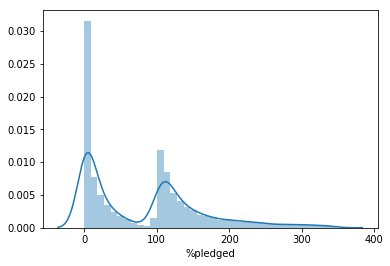

In [71]:
sns.distplot(chartdf['%pledged'])

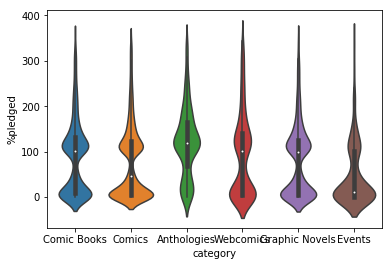

In [72]:
sns.violinplot(x='category', y='%pledged', data=chartdf)

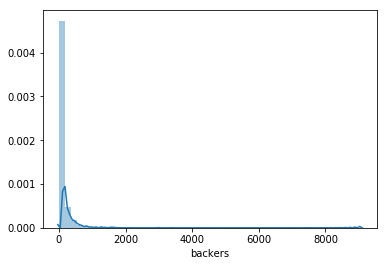

In [73]:
sns.distplot(chartdf['backers'])

In [74]:
pd.value_counts(comicdf['state'])

successful    10349
failed         7446
canceled       1545
live            193
suspended        42
Name: state, dtype: int64

In [75]:
comicdf.groupby('state')['%pledged', 'backers'].median()

,%pledged,backers
state,,
canceled,2.714286,5
failed,6.600000,8
live,38.452000,25
successful,138.000000,101
suspended,1.000000,1


In [76]:
comicdf.groupby('state')['%pledged', 'backers'].mean()

,%pledged,backers
state,,
canceled,21.027180,18.777994
failed,14.632643,21.255305
live,487.660502,71.196891
successful,1254.876209,235.145425
suspended,21.946768,3.714286


In [77]:
def state_to_numeric(x):
    if x=='successful':
        return 1
    if x=='failed':
        return 0
    if x=='canceled':
        return 0
    if x=='suspended':
        return 0
    
comicdf['state_val'] = comicdf['state'].apply(state_to_numeric)
comicdf.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,main_category,category,country,state,goal,pledged,currency,backers,%pledged,state_val
14,Comics,Comic Books,US,failed,1500.0,395.00,USD,16,26.333333,0.0
21,Comics,Comics,US,successful,175.0,701.66,USD,66,400.948571,1.0
25,Comics,Comics,GB,successful,100.0,112.38,GBP,27,112.380000,1.0
76,Comics,Anthologies,CA,successful,4000.0,4944.50,CAD,153,123.612500,1.0
81,Comics,Comics,US,failed,4289.0,474.00,USD,14,11.051527,0.0


In [78]:
pd.value_counts(comicdf['state_val'])

1.0    10349
0.0     9033
Name: state_val, dtype: int64

In [79]:
comicdf.groupby('category')['%pledged', 'backers','state_val'].median()

,%pledged,backers,state_val
category,,,
Anthologies,123.752404,122,1.0
Comic Books,105.523810,39,1.0
Comics,85.300000,33,0.0
Events,12.200000,9,0.0
Graphic Novels,102.233333,50,1.0
Webcomics,108.228571,40,1.0


In [80]:
comicdf.groupby('category')['%pledged', 'backers','state_val'].mean()

,%pledged,backers,state_val
category,,,
Anthologies,171.055881,295.851744,0.749267
Comic Books,1716.235337,85.383648,0.583223
Comics,256.548194,129.623431,0.497501
Events,68.559590,46.568027,0.298969
Graphic Novels,780.802340,152.093304,0.539873
Webcomics,161.365847,253.727435,0.560181


In [81]:
comicdf.groupby('country')['%pledged', 'backers','state_val'].mean()

,%pledged,backers,state_val
country,,,
AT,74.382291,97.000000,0.444444
AU,959.331254,70.324921,0.516026
BE,22.072648,14.500000,0.090909
CA,163.790365,128.642070,0.543430
CH,63.241731,39.375000,0.500000
DE,55.360725,117.784810,0.223684
DK,49.863894,44.074074,0.320000
ES,89.996692,94.428571,0.306452
FR,101.969632,211.222222,0.400000


In [82]:
comicdf.groupby('country')['%pledged', 'backers','state_val'].median()

,%pledged,backers,state_val
country,,,
AT,34.041985,107.0,0.0
AU,106.340000,34.0,1.0
BE,1.877500,4.0,0.0
CA,102.260109,41.0,1.0
CH,65.076923,22.0,0.5
DE,4.642857,7.0,0.0
DK,11.053333,6.0,0.0
ES,16.666667,10.0,0.0
FR,32.604651,15.0,0.0


In [83]:
comicdf2 = comicdf.drop(['state','currency'], axis=1)
comicdf2.count()

main_category    19575
category         19575
country          19575
goal             19575
pledged          19575
backers          19575
%pledged         19575
state_val        19382
dtype: int64

In [84]:
comicstdf = comicdf2.dropna()
comicstdf.count()

main_category    19382
category         19382
country          19382
goal             19382
pledged          19382
backers          19382
%pledged         19382
state_val        19382
dtype: int64

In [85]:
comicstdf.describe()

,goal,pledged,backers,%pledged,state_val
count,1.938200e+04,1.938200e+04,19382.000000,19382.000000,19382.000000
mean,2.153619e+04,6.885810e+03,135.226241,677.385064,0.533949
std,1.026286e+06,2.602828e+04,402.530130,11853.606644,0.498859
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.500000e+03,2.500000e+02,8.000000,7.366667,0.000000
50%,3.500000e+03,1.467000e+03,39.000000,102.500000,1.000000
75%,8.000000e+03,5.100000e+03,117.000000,143.600000,1.000000
max,1.000000e+08,1.254120e+06,14952.000000,551400.000000,1.000000


In [86]:
bins = [0, 1500, 3500, 8000, 100000000]

group_names = ['low', 'low mid', 'high mid', 'high']

comicstdf['goallevel'] = pd.cut(comicstdf['goal'], bins, labels=group_names)
comicstdf.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,main_category,category,country,goal,pledged,backers,%pledged,state_val,goallevel
14,Comics,Comic Books,US,1500.0,395.00,16,26.333333,0.0,low
21,Comics,Comics,US,175.0,701.66,66,400.948571,1.0,low
25,Comics,Comics,GB,100.0,112.38,27,112.380000,1.0,low
76,Comics,Anthologies,CA,4000.0,4944.50,153,123.612500,1.0,high mid
81,Comics,Comics,US,4289.0,474.00,14,11.051527,0.0,high mid


In [87]:
def country_to_numeric(x):
    if x=='US':
        return 1
    if x=='GB':
        return 1
    if x=='AU':
        return 1
    if x=='CA':
        return 1
    
comicstdf['eng_val'] = comicstdf['country'].apply(country_to_numeric)
comicstdf.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,main_category,category,country,goal,pledged,backers,%pledged,state_val,goallevel,eng_val
14,Comics,Comic Books,US,1500.0,395.00,16,26.333333,0.0,low,1.0
21,Comics,Comics,US,175.0,701.66,66,400.948571,1.0,low,1.0
25,Comics,Comics,GB,100.0,112.38,27,112.380000,1.0,low,1.0
76,Comics,Anthologies,CA,4000.0,4944.50,153,123.612500,1.0,high mid,1.0
81,Comics,Comics,US,4289.0,474.00,14,11.051527,0.0,high mid,1.0


In [88]:
comicstdf["eng_val"].fillna(0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [103]:
comicstdf.to_csv('mod3kick.csv',index=True,header=True)

In [89]:
comdf=comicstdf.drop(['main_category', 'category', 'country','goallevel', 
                      'goal', 'pledged', 'state_val'], axis=1)

In [90]:
X = comdf.drop('%pledged', axis = 1)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
lm.fit(X, comdf['%pledged'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 126.121237697


In [93]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,backers,-0.057016
1,eng_val,574.018829


In [94]:
lm.score(X, comdf['%pledged'])

6.3229676497966736e-05

In [95]:
modeldf=comicstdf.drop(['main_category', 'category', 'country', 'goal', 'pledged','backers',
                      '%pledged'], axis=1)
modeldf.head()

,state_val,goallevel,eng_val
14,0.0,low,1.0
21,1.0,low,1.0
25,1.0,low,1.0
76,1.0,high mid,1.0
81,0.0,high mid,1.0


In [96]:
modeldf = pd.get_dummies(data=modeldf, columns=['goallevel'])
modeldf.head()

,state_val,eng_val,goallevel_low,goallevel_low mid,goallevel_high mid,goallevel_high
14,0.0,1.0,1,0,0,0
21,1.0,1.0,1,0,0,0
25,1.0,1.0,1,0,0,0
76,1.0,1.0,0,0,1,0
81,0.0,1.0,0,0,1,0


In [97]:
y = modeldf['state_val']
X = modeldf.drop(['state_val'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
LogReg.score(X_train, y_train)

0.60432118671396329

In [99]:
y_pred = LogReg.predict(X_test)

In [100]:
cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Not Success', 'Predicted Success'],
    index=['True Not Success', 'True Success']
)

cm

,Predicted Not Success,Predicted Success
True Not Success,1077,696
True Success,822,1282


In [101]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.57      0.61      0.59      1773
        1.0       0.65      0.61      0.63      2104

avg / total       0.61      0.61      0.61      3877

